## Setting Up Plots

In [ ]:
import numpy as np
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import pickle
from coffea import hist, processor, util
from plots.helpers import makePlot2
from coffea.processor import accumulate
from yahist import Hist1D, Hist2D
from yaml import Loader, Dumper
import yaml
from tools.helpers import cutflow_scale_and_merge, getCutFlowTable

In [ ]:
scaled_output = accumulate(
    [
        util.load("/home/users/dspitzba/snowblower/analysis/outputs/output_signal_scaled_run20220125_150734.coffea"),
        util.load("/home/users/dspitzba/snowblower/analysis/outputs/output_QCD_scaled_run20220125_171824.coffea"),
        util.load("/home/users/dspitzba/snowblower/analysis/outputs/output_TT_scaled_run20220125_171025.coffea"),
        util.load("/home/users/dspitzba/snowblower/analysis/outputs/output_W_scaled_run20220125_170224.coffea"),
        util.load("/home/users/dspitzba/snowblower/analysis/outputs/output_Z_scaled_run20220125_183109.coffea"),
        #util.load("/home/users/dspitzba/snowblower/analysis/outputs/output_other_scaled_run20220125_163014.coffea"),
    ]
)

In [ ]:
scaled_output = accumulate(
        [
            util.load("/home/users/ewallace/snowblower/analysis/outputs/output_all_scaled_run20220131_132242.coffea"),
        ]
    )

In [ ]:
scaled_output2 = accumulate(
        [
            util.load("/home/users/ewallace/snowblower/analysis/outputs/output_other_scaled_run20220203_174135.coffea"),
        ]
    )

In [ ]:
N_bins = hist.Bin('multiplicity', r'$N$', 4, 0.5, 4.5)
N_bins2 = hist.Bin('multiplicity', r'$N$', 7, 0.5, 7.5)
N_H_bins = hist.Bin('multiplicity', r'$N$', 1, -0.5, 0.5)
mass_bins = hist.Bin('mass', r'$M\ (GeV)$', 40, 0, 400)
mass_bins2 = hist.Bin('mass', r'$M\ (GeV)$', 3, 0, 150)
ht_bins = hist.Bin('pt', r'$H_{T}\ (GeV)$', 60, 0, 3000)
mt_bins = hist.Bin('mt', r'$M_{T}\ (GeV)$', 9, 600, 2400)
pt_bins = hist.Bin('pt', r'$p_{T}\ (GeV)$', 40, 200, 1200)
pt_bins2 = hist.Bin('pt', r'$p_{T}\ (GeV)$', 50, 0, 500)
met_bins = hist.Bin('pt', r'$MET_{pt}\ (GeV)$', 18, 100, 1000)
met_bins_ext = hist.Bin('pt', r'$MET_{pt}\ (GeV)$', 20, 0, 1000)
eta_bins = hist.Bin("eta", "$\eta$", 33, -4, 4)
phi_bins = hist.Bin("phi", "$\phi$", 33, -4, 4)
phi_bins2 = hist.Bin("phi", "$\phi$", 20, 0, 4)
tau1_bins = hist.Bin("tau", "$\tau_1$", 10, 0, 0.7)
tau2_bins = hist.Bin("tau", "$\tau_2$", 10, 0, 0.5)
tau3_bins = hist.Bin("tau", "$\tau_3$", 10, 0, 0.4)
tau4_bins = hist.Bin("tau", "$\tau_4$", 10, 0, 0.3)
tau21_bins = hist.Bin("tau", "$\tau_4$", 50, 0, 1.0)

labels ={
            ('QCD_bEnriched_HT',): r'$Mulitijet$',
            ('ZJetsToNuNu_HT',): r'$Z\to\nu\nu$',
            ('WJetsToLNu',): r'$W+jets$',
            ('TT',): r'$t\bar{t}/single-t$',
            ('other',): 'SM Higgs',
            ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500',): r'$m_A=1500, m_a=150$',
            ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500',): r'$m_A=1500, m_a=750$',
            ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750',): r'$m_A=1750, m_a=750$',
            ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000',): r'$m_A=2000, m_a=750$',
        }

colors ={
            ('QCD_bEnriched_HT',): '#93CCEA',
            ('ZJetsToNuNu_HT',): '#00C239',
            ('WJetsToLNu',): '#FED23F',
            ('TT',): '#FE3F6B',
            ('other',): '#EAB193'
        }
        
signals = [('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750',), 
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000',),
           ('ST',),
           ('Rares',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1250_MH4_750_MH2_1250_MHC_1250',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1600_MH4_750_MH2_1600_MHC_1600',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_750_MH2_1900_MHC_1900',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_750_MH2_2250_MHC_2250',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_750_MH4_250_MH2_750_MHC_750',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_250_MH2_1000_MHC_1000',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1250_MH4_250_MH2_1250_MHC_1250',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_250_MH2_1500_MHC_1500',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1600_MH4_250_MH2_1600_MHC_1600',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_250_MH2_1750_MHC_1750',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_250_MH2_2000_MHC_2000',),
           ('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2250_MH4_250_MH2_2250_MHC_2250',),
        ]

plot_dir = '/home/users/$USER/public_html/HbbMET/plots/Jan30/'

In [ ]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [ ]:
makePlot2(scaled_output, 'met_pt', 'pt', met_bins, r'$MET_{pt}\ (GeV)$', labels, colors, signals, plot_dir)
makePlot2(scaled_output, 'min_AK8_pt', 'pt', pt_bins, r'$p_{T}\ (GeV)$', labels, colors, signals, plot_dir)
makePlot2(scaled_output, 'n_AK4', 'multiplicity', N_bins2, r'$N_{AK4}$', labels, colors, signals, plot_dir)
makePlot2(scaled_output, 'AK4_QCD_veto', 'phi', phi_bins2, r'$\Delta\varphi$', labels, colors, signals, plot_dir)
makePlot2(scaled_output, 'AK8_QCD_veto', 'phi', phi_bins2, r'$\Delta\varphi$', labels, colors, signals, plot_dir)
makePlot2(scaled_output, 'dphi_AK4_MET', 'phi', phi_bins2, r'$\Delta\varphi$', labels, colors, signals, plot_dir)
makePlot2(scaled_output, 'dphi_AK8_MET', 'phi', phi_bins2, r'$\Delta\varphi$', labels, colors, signals, plot_dir)
makePlot2(scaled_output, 'AK8_sdmass', 'mass', mass_bins, r'$softdrop\ mass\ (GeV)$', labels, colors, signals, plot_dir)
makePlot2(scaled_output, 'MT', 'mt', mt_bins, r'$M_{T}$', labels, colors, signals, plot_dir)
makePlot2(scaled_output, 'NH_weight', 'multiplicity', N_H_bins, r'$N_{H-tagged}$', labels, colors, signals, plot_dir)

In [ ]:
import os

output = scaled_output
histo = 'met_pt'
axis = 'pt'
bins = met_bins
xlabel = r'$MET_{pt}\ (GeV)$'

histos = {}
        
tmp1 = output[histo]
tmp1 = tmp1.rebin(axis, bins)

tmp2 = scaled_output2[histo].copy()
tmp2 = tmp2.rebin(axis, bins)
    
keys = tmp1.values().keys()
            
for sample in keys:
    if sample == ('other',):
        h1 = Hist1D.from_bincounts(
            tmp2.values(overflow = 'all')[sample].T,
            (tmp2.axis(axis).edges(overflow = 'all')),
            errors = np.sqrt(tmp2.values(sumw2=True, overflow = 'all')[sample][1].T),
        )
    else:
        h1 = Hist1D.from_bincounts(
            tmp1.values(overflow = 'all')[sample].T,
            (tmp1.axis(axis).edges(overflow = 'all')),
            errors = np.sqrt(tmp1.values(sumw2=True, overflow = 'all')[sample][1].T),
        )
    histos[sample] = h1

edge = list(keys)[0]
        
backgrounds = []
for sample in keys:
    if sample not in signals:
        backgrounds += (sample,)
                           
order = [('other',), ('WJetsToLNu',), ('TT',), ('QCD_bEnriched_HT',), ('ZJetsToNuNu_HT',),]
#total_mc = get_total(histos, backgrounds)
        
fig, (ax) = plt.subplots(figsize=(10,10))
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    #lumi = 3000,
    rlabel = '14 TeV',
        )
if backgrounds != []:
    hep.histplot(
        [histos[sample].counts for sample in order],
        histos[edge].edges,
        #w2=[(histos[sample].errors)**2 for sample in order],
        histtype="fill",
        density = False,
        stack=True,
        label=[labels[sample] for sample in order],
        color=[colors[sample] for sample in order],
        ax=ax
    )
        
hep.histplot(
    [histos[sample].counts for sample in signals[1:4]],
    histos[edge].edges,
    w2=[(histos[sample].errors)**2 for sample in signals[1:4]],
    histtype="step",
    density = False,
    stack=False,
    label=[labels[sample] for sample in signals[1:4]],
    ax=ax
)
        
ax.set_xlabel(xlabel)
ax.set_ylabel(r'Events')
ax.set_yscale('log')
ax.legend(prop={'size': 10})
        
#add_uncertainty(total_mc, ax, ratio=True)

fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/Feb3/'+str(histo)+'.png')

# 2D Plots

In [ ]:
MT_vs_sdmass = {
    #'2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750': {},
    '2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000': {},
    'ZJetsToNuNu_HT':        {},
    'other':                 {},
    'TT':        {},
    'WJetsToLNu':        {},
    'QCD_bEnriched_HT':        {},
}

In [ ]:
for sample in MT_vs_sdmass:
    MT_vs_sdmass[sample] = Hist2D.from_bincounts(
        scaled_output['MT_vs_sdmass'].values(overflow='over')[(sample,)].T,
        (scaled_output['MT_vs_sdmass'].axis('mt').edges(overflow='over'), scaled_output['MT_vs_sdmass'].axis('mass').edges(overflow='over')),
        errors = np.sqrt(scaled_output['MT_vs_sdmass'].values(sumw2=True, overflow='over')[(sample,)][1].T),
    )

In [ ]:
fig, ax  = plt.subplots(1, 1,figsize=(13,10) )
MT_vs_sdmass['QCD_bEnriched_HT'].plot(counts=True, equidistant='xy', counts_formatter="{:.2e} \n$\pm$\n {:.2e}".format, counts_fontsize=10,)
ax.set_xlabel(r'$M_{T}$')
ax.set_ylabel(r'$softdrop\ mass$')
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/Jan30/MT_vs_sdmass_QCD.png')

In [ ]:
fig, ax  = plt.subplots(1, 1,figsize=(13,10) )
MT_vs_sdmass['TT'].plot(counts=True, equidistant='xy', counts_formatter="{:.2e} \n$\pm$\n {:.2e}".format, counts_fontsize=10,)
ax.set_xlabel(r'$M_{T}$')
ax.set_ylabel(r'$softdrop\ mass$')
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/Jan30/MT_vs_sdmass_TT.png')

In [ ]:
fig, ax  = plt.subplots(1, 1,figsize=(13,10) )
MT_vs_sdmass['WJetsToLNu'].plot(counts=True, equidistant='xy', counts_formatter="{:.2e} \n$\pm$\n {:.2e}".format, counts_fontsize=10,)
ax.set_xlabel(r'$M_{T}$')
ax.set_ylabel(r'$softdrop\ mass$')
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/Jan30/MT_vs_sdmass_WJetsToLNu.png')

In [ ]:
fig, ax  = plt.subplots(1, 1,figsize=(13,10) )
MT_vs_sdmass['ZJetsToNuNu_HT'].plot(counts=True, equidistant='xy', counts_formatter="{:.2e} \n$\pm$\n {:.2e}".format, counts_fontsize=10,)
ax.set_xlabel(r'$M_{T}$')
ax.set_ylabel(r'$softdrop\ mass$')
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/Jan30/MT_vs_sdmass_ZJetsToNuNu.png')

In [ ]:
fig, ax  = plt.subplots(1, 1,figsize=(13,10) )
MT_vs_sdmass['other'].plot(counts=True, equidistant='xy', counts_formatter="{:.2e} \n$\pm$\n {:.2e}".format, counts_fontsize=10,)
ax.set_xlabel(r'$M_{T}$')
ax.set_ylabel(r'$softdrop\ mass$')
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/Jan30/MT_vs_sdmass_SMHiggs.png')

In [ ]:
fig, ax  = plt.subplots(1, 1,figsize=(13,10) )
MT_vs_sdmass['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500'].plot(counts=True, equidistant='xy', counts_formatter="{:.2e} \n$\pm$\n {:.2e}".format, counts_fontsize=10,)
ax.set_xlabel(r'$M_{T}$')
ax.set_ylabel(r'$softdrop\ mass$')
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/Jan30/MT_vs_sdmass_1500_750.png')

In [ ]:
fig, ax  = plt.subplots(1, 1,figsize=(13,10) )
MT_vs_sdmass['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750'].plot(counts=True, equidistant='xy', counts_formatter="{:.2e} \n$\pm$\n {:.2e}".format, counts_fontsize=10,)
ax.set_xlabel(r'$M_{T}$')
ax.set_ylabel(r'$softdrop\ mass$')
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/Jan30/MT_vs_sdmass_1750_750.png')

In [ ]:
fig, ax  = plt.subplots(1, 1,figsize=(13,10) )
MT_vs_sdmass['2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000'].plot(counts=True, equidistant='xy', counts_formatter="{:.2e} \n$\pm$\n {:.2e}".format, counts_fontsize=10,)
ax.set_xlabel(r'$M_{T}$')
ax.set_ylabel(r'$softdrop\ mass$')
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/Jan30/MT_vs_sdmass_2000_750.png')

# Cutflow

In [ ]:
output_delphes = accumulate(
    [
        util.load("/home/users/ewallace/snowblower/analysis/outputs/output_Z_run20220308_144548_delphes.coffea"),
    ]
)

In [ ]:
output_flat = accumulate(
    [
        util.load("/home/users/ewallace/snowblower/analysis/outputs/output_Z_run20220304_085914.coffea"),
    ]
)

In [ ]:
with open('../data/samples.yaml', 'r') as f:
    samples = yaml.load(f, Loader = Loader)

In [ ]:
fileset_flat = {
    #'TT_TuneCUETP8M2T4_14TeV-powheg-pythia8_200PU': samples['TT_TuneCUETP8M2T4_14TeV-powheg-pythia8_200PU']['skim'],
    #'TT_Mtt1000toInf_TuneCUETP8M1_14TeV-powheg-pythia8_200PU': samples['TT_Mtt1000toInf_TuneCUETP8M1_14TeV-powheg-pythia8_200PU']['skim'],
    #'ST_tch_14TeV_top_incl-powheg-pythia8-madspin_200PU': samples['ST_tch_14TeV_top_incl-powheg-pythia8-madspin_200PU']['skim'],
    #'ST_tch_14TeV_antitop_incl-powheg-pythia8-madspin_200PU': samples['ST_tch_14TeV_antitop_incl-powheg-pythia8-madspin_200PU']['skim'],
    #'ST_tW_top_5f_inclusiveDecays_14TeV-powheg-pythia8_TuneCUETP8M1_200PU': samples['ST_tW_top_5f_inclusiveDecays_14TeV-powheg-pythia8_TuneCUETP8M1_200PU']['skim'],
    #'ST_tW_antitop_5f_inclusiveDecays_14TeV-powheg-pythia8_TuneCUETP8M1_200PU': samples['ST_tW_antitop_5f_inclusiveDecays_14TeV-powheg-pythia8_TuneCUETP8M1_200PU']['skim'],
    'ZJetsToNuNu_HT-100To200_14TeV-madgraph_200PU': samples['ZJetsToNuNu_HT-100To200_14TeV-madgraph_200PU']['skim'],
    'ZJetsToNuNu_HT-200To400_14TeV-madgraph_200PU': samples['ZJetsToNuNu_HT-200To400_14TeV-madgraph_200PU']['skim'],
    'ZJetsToNuNu_HT-400To600_14TeV-madgraph_200PU': samples['ZJetsToNuNu_HT-400To600_14TeV-madgraph_200PU']['skim'],
    'ZJetsToNuNu_HT-600To800_14TeV-madgraph_200PU': samples['ZJetsToNuNu_HT-600To800_14TeV-madgraph_200PU']['skim'],
    'ZJetsToNuNu_HT-800To1200_14TeV-madgraph_200PU': samples['ZJetsToNuNu_HT-800To1200_14TeV-madgraph_200PU']['skim'],
    'ZJetsToNuNu_HT-1200To2500_14TeV-madgraph_200PU': samples['ZJetsToNuNu_HT-1200To2500_14TeV-madgraph_200PU']['skim'],
    'ZJetsToNuNu_HT2500toInf_HLLHC': samples['ZJetsToNuNu_HT2500toInf_HLLHC']['skim'],
    #'WJetsToLNu_GenMET-100_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['WJetsToLNu_GenMET-100_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'WJetsToLNu_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['WJetsToLNu_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT1000to1500_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT1000to1500_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT1500to2000_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT1500to2000_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT2000toInf_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT2000toInf_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT200to300_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT200to300_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT300to500_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT300to500_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT500to700_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT500to700_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT700to1000_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT700to1000_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'ZH_HToBB_ZToNuNu_M125_13TeV_powheg_pythia8_200PU': samples['ZH_HToBB_ZToNuNu_M125_13TeV_powheg_pythia8_200PU']['skim'],
    #'WminusH_HToBB_WToLNu_M125_14TeV_powheg_pythia8_200PU': samples['WminusH_HToBB_WToLNu_M125_14TeV_powheg_pythia8_200PU']['skim'],
    #'WplusH_HToBB_WToLNu_M125_14TeV_powheg_pythia8_200PU': samples['WplusH_HToBB_WToLNu_M125_14TeV_powheg_pythia8_200PU']['skim'],
    #'2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000': samples['2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000']['ntuples'],
    #'2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000': samples['2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000']['ntuples'],
    #'2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500': samples['2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500']['ntuples'],
    #'2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500': samples['2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500']['ntuples'],
    #'2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500': samples['2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500']['ntuples'],
    #'2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750': samples['2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750']['ntuples'],
    #'2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000': samples['2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000']['ntuples'],
    #'2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900': samples['2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900']['ntuples'],
    #'2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500': samples['2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500']['ntuples'],
    #'2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750': samples['2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750']['ntuples'],
    #'2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000': samples['2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000']['ntuples'],
    #'2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900': samples['2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900']['ntuples'],
}

fileset_delphes= {
    #'TT_TuneCUETP8M2T4_14TeV-powheg-pythia8_200PU': samples['TT_TuneCUETP8M2T4_14TeV-powheg-pythia8_200PU']['skim'],
    #'TT_Mtt1000toInf_TuneCUETP8M1_14TeV-powheg-pythia8_200PU': samples['TT_Mtt1000toInf_TuneCUETP8M1_14TeV-powheg-pythia8_200PU']['skim'],
    #'ST_tch_14TeV_top_incl-powheg-pythia8-madspin_200PU': samples['ST_tch_14TeV_top_incl-powheg-pythia8-madspin_200PU']['skim'],
    #'ST_tch_14TeV_antitop_incl-powheg-pythia8-madspin_200PU': samples['ST_tch_14TeV_antitop_incl-powheg-pythia8-madspin_200PU']['skim'],
    #'ST_tW_top_5f_inclusiveDecays_14TeV-powheg-pythia8_TuneCUETP8M1_200PU': samples['ST_tW_top_5f_inclusiveDecays_14TeV-powheg-pythia8_TuneCUETP8M1_200PU']['skim'],
    #'ST_tW_antitop_5f_inclusiveDecays_14TeV-powheg-pythia8_TuneCUETP8M1_200PU': samples['ST_tW_antitop_5f_inclusiveDecays_14TeV-powheg-pythia8_TuneCUETP8M1_200PU']['skim'],
    'ZJetsToNuNu_HT-100To200_14TeV-madgraph_200PU': samples['ZJetsToNuNu_HT-100To200_14TeV-madgraph_200PU']['skim'],
    'ZJetsToNuNu_HT-200To400_14TeV-madgraph_200PU': samples['ZJetsToNuNu_HT-200To400_14TeV-madgraph_200PU']['skim'],
    'ZJetsToNuNu_HT-400To600_14TeV-madgraph_200PU': samples['ZJetsToNuNu_HT-400To600_14TeV-madgraph_200PU']['skim'],
    'ZJetsToNuNu_HT-600To800_14TeV-madgraph_200PU': samples['ZJetsToNuNu_HT-600To800_14TeV-madgraph_200PU']['skim'],
    'ZJetsToNuNu_HT-800To1200_14TeV-madgraph_200PU': samples['ZJetsToNuNu_HT-800To1200_14TeV-madgraph_200PU']['skim'],
    'ZJetsToNuNu_HT-1200To2500_14TeV-madgraph_200PU': samples['ZJetsToNuNu_HT-1200To2500_14TeV-madgraph_200PU']['delphes'],
    'ZJetsToNuNu_HT2500toInf_HLLHC': samples['ZJetsToNuNu_HT2500toInf_HLLHC']['skim'],
    #'WJetsToLNu_GenMET-100_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['WJetsToLNu_GenMET-100_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'WJetsToLNu_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['WJetsToLNu_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT1000to1500_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT1000to1500_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT1500to2000_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT1500to2000_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT2000toInf_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT2000toInf_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT200to300_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT200to300_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT300to500_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT300to500_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT500to700_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT500to700_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'QCD_bEnriched_HT700to1000_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU': samples['QCD_bEnriched_HT700to1000_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU']['skim'],
    #'ZH_HToBB_ZToNuNu_M125_13TeV_powheg_pythia8_200PU': samples['ZH_HToBB_ZToNuNu_M125_13TeV_powheg_pythia8_200PU']['skim'],
    #'WminusH_HToBB_WToLNu_M125_14TeV_powheg_pythia8_200PU': samples['WminusH_HToBB_WToLNu_M125_14TeV_powheg_pythia8_200PU']['skim'],
    #'WplusH_HToBB_WToLNu_M125_14TeV_powheg_pythia8_200PU': samples['WplusH_HToBB_WToLNu_M125_14TeV_powheg_pythia8_200PU']['skim'],
    #'2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000': samples['2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000']['ntuples'],
    #'2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000': samples['2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000']['ntuples'],
    #'2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500': samples['2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500']['ntuples'],
    #'2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500': samples['2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500']['ntuples'],
    #'2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500': samples['2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500']['ntuples'],
    #'2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750': samples['2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750']['ntuples'],
    #'2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000': samples['2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000']['ntuples'],
    #'2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900': samples['2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900']['delphes'],
    #'2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500': samples['2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500']['ntuples'],
    #'2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750': samples['2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750']['ntuples'],
    #'2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000': samples['2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000']['ntuples'],
    #'2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900': samples['2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900']['delphes'],
}



In [ ]:
# manual nevents
signal = [
    '2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000',
    '2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000',
    '2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500',
    '2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500',
    '2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500',
    '2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750',
    '2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000',
    '2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900',
    '2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500',
    '2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750',
    '2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000',
    '2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900'
]

nevents_delphes = {}

for sample in fileset_delphes:
    if sample in signal:
        nevents_delphes[sample] = samples[sample]['nevents']

nevents_delphes['ZJetsToNuNu_HT-100To200_14TeV-madgraph_200PU'] = 48875780
nevents_delphes['ZJetsToNuNu_HT-200To400_14TeV-madgraph_200PU'] = 15554809
nevents_delphes['ZJetsToNuNu_HT-400To600_14TeV-madgraph_200PU'] = 4119244
nevents_delphes['ZJetsToNuNu_HT-600To800_14TeV-madgraph_200PU'] = 1625145
nevents_delphes['ZJetsToNuNu_HT-800To1200_14TeV-madgraph_200PU'] = 2147676
nevents_delphes['ZJetsToNuNu_HT-1200To2500_14TeV-madgraph_200PU'] = 1556528
nevents_delphes['ZJetsToNuNu_HT2500toInf_HLLHC'] = 68125

meta_delphes = {}

for sample in fileset_delphes:
    meta_delphes[sample] = output_delphes[sample]
    meta_delphes[sample]['xsec'] = samples[sample]['xsec']
    meta_delphes[sample]['nevents'] = nevents_delphes[sample]

In [ ]:
import uproot
signal = [
    '2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000',
    '2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1000_MH4_150_MH2_1000_MHC_1000',
    '2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500',
    '2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500',
    '2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500',
    '2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750',
    '2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000',
    '2HDMa_bb_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900',
    '2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500',
    '2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750',
    '2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000',
    '2HDMa_gg_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900'
]

nevents_flat = {}

for sample in fileset_flat:
    nevents_flat[sample] = 0
    if sample in signal:
        nevents_flat[sample] = samples[sample]['nevents']
    else:   
        for file in fileset_flat[sample]:
            with uproot.open(file+':nevents') as counts:
                nevents_flat[file] = counts.counts()[0]
                nevents_flat[sample] += nevents_flat[file]

meta_flat = {}

for sample in fileset_flat:
    meta_flat[sample] = output_flat[sample]
    meta_flat[sample]['xsec'] = samples[sample]['xsec']
    meta_flat[sample]['nevents'] = nevents_flat[sample]

In [ ]:
output_flat['cutflow']

In [ ]:
output_delphes['cutflow']

In [ ]:
cutflow_flat = cutflow_scale_and_merge(output_flat['cutflow'], meta_flat, fileset_flat, 3000)

In [ ]:
cutflow_delphes = cutflow_scale_and_merge(output_delphes['cutflow'], meta_delphes, fileset_delphes, 3000)

In [ ]:
proceses = ['ZJetsToNuNu_HT'] #, 'WJetsToLNu', 'QCD_bEnriched_HT', 'TT', 'other', '2HDMa_1500__150', '2HDMa_1000__150'
cuts = ['total', 'ele_veto', 'mu_veto', 'tau_veto', 'MET>300',  'N_AK8>0', 'N_AK4>1', 'min_AK8_pt', 'dphi_AK8_MET>1', '1<dphi_AK4_MET<3', 'AK4_QCD_veto', 'AK8_QCD_veto', 'N_H>0', 'on_H', 'MT>600', 'MT>1200' ]

In [ ]:
cutflow_table_flat = getCutFlowTable(cutflow_flat, proceses, cuts, significantFigures=7, absolute=True)

In [ ]:
cutflow_table_delphes = getCutFlowTable(cutflow_delphes, proceses, cuts, significantFigures=7, absolute=True)

In [ ]:
cutflow = pd.concat((cutflow_table_flat, cutflow_table_delphes),axis=1)

In [ ]:
cutflow

# Other Plots

In [ ]:
path = '../analysis/histos/scaled_output.pkl.gz'
with gzip.open(path) as fin:
    scaled_output = pickle.load(fin)

In [ ]:
pt_coarse_bins = hist.Bin('pt', r'$p_{T}\ (GeV)$', 10, 200, 1200)
phi_coarse_bins = hist.Bin("phi", "$\phi$", 20, 0, 4)

scaled_output['b_DeltaR_vs_H_pt'] = scaled_output['b_DeltaR_vs_H_pt'].rebin('pt', pt_coarse_bins)
scaled_output['b_DeltaR_vs_H_pt'] = scaled_output['b_DeltaR_vs_H_pt'].rebin('phi', phi_coarse_bins)

b_DeltaR_vs_H_pt_1500_150 = Hist2D.from_bincounts(
    scaled_output['b_DeltaR_vs_H_pt'].values(overflow='over')[('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500',)].T,
    (scaled_output['b_DeltaR_vs_H_pt'].axis('pt').edges(overflow='over'), scaled_output['b_DeltaR_vs_H_pt'].axis('phi').edges(overflow='over')),
    errors = np.sqrt(scaled_output['b_DeltaR_vs_H_pt'].values(sumw2=True, overflow='over')[('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_150_MH2_1500_MHC_1500',)][1].T),
)

b_DeltaR_vs_H_pt_1500_750 = Hist2D.from_bincounts(
    scaled_output['b_DeltaR_vs_H_pt'].values(overflow='over')[('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500',)].T,
    (scaled_output['b_DeltaR_vs_H_pt'].axis('pt').edges(overflow='over'), scaled_output['b_DeltaR_vs_H_pt'].axis('phi').edges(overflow='over')),
    errors = np.sqrt(scaled_output['b_DeltaR_vs_H_pt'].values(sumw2=True, overflow='over')[('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1500_MH4_750_MH2_1500_MHC_1500',)][1].T),
)

b_DeltaR_vs_H_pt_1750_750 = Hist2D.from_bincounts(
    scaled_output['b_DeltaR_vs_H_pt'].values(overflow='over')[('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750',)].T,
    (scaled_output['b_DeltaR_vs_H_pt'].axis('pt').edges(overflow='over'), scaled_output['b_DeltaR_vs_H_pt'].axis('phi').edges(overflow='over')),
    errors = np.sqrt(scaled_output['b_DeltaR_vs_H_pt'].values(sumw2=True, overflow='over')[('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1750_MH4_750_MH2_1750_MHC_1750',)][1].T),
)

b_DeltaR_vs_H_pt_2000_750 = Hist2D.from_bincounts(
    scaled_output['b_DeltaR_vs_H_pt'].values(overflow='over')[('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000',)].T,
    (scaled_output['b_DeltaR_vs_H_pt'].axis('pt').edges(overflow='over'), scaled_output['b_DeltaR_vs_H_pt'].axis('phi').edges(overflow='over')),
    errors = np.sqrt(scaled_output['b_DeltaR_vs_H_pt'].values(sumw2=True, overflow='over')[('2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_2000_MH4_750_MH2_2000_MHC_2000',)][1].T),
)

In [ ]:
scaled_output['b_DeltaR_vs_H_pt']

In [ ]:
fig, ax  = plt.subplots(1, 1,figsize=(13,10) )
b_DeltaR_vs_H_pt_1500_150.plot(counts=False, equidistant='xy', counts_formatter="{:.1e} \n$\pm$\n {:.1e}".format, counts_fontsize=10,)
ax.set_xlabel(r'$p_{T}$')
ax.set_ylabel(r'$\Delta\ R$')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/MT_vs_sdmass_2000_750.png')

In [ ]:
target = scaled_output['b_DeltaR_vs_H_pt'].integrate('pt', slice(200,1200), overflow='over').integrate('phi', slice(0,0.8)).values()

In [ ]:
total = scaled_output['b_DeltaR_vs_H_pt'].integrate('pt', overflow='over').integrate('phi', overflow='over').values()

In [ ]:
frac = {}
for key in target:
    frac[key] = target[key]/total[key]

In [ ]:
frac

In [ ]:
fig, ax  = plt.subplots(1, 1,figsize=(13,10) )
b_DeltaR_vs_H_pt_1500_750.plot(counts=True, equidistant='xy', counts_formatter="{:.2e} \n$\pm$\n {:.2e}".format, counts_fontsize=10,)
ax.set_xlabel(r'$p_{T}$')
ax.set_ylabel(r'$\Delta\ R$')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/MT_vs_sdmass_2000_750.png')

In [ ]:
fig, ax  = plt.subplots(1, 1,figsize=(13,10) )
b_DeltaR_vs_H_pt_1750_750.plot(counts=False, equidistant='xy', counts_formatter="{:.2e} \n$\pm$\n {:.2e}".format, counts_fontsize=10,)
ax.set_xlabel(r'$p_{T}$')
ax.set_ylabel(r'$\Delta\ R$')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/signal_region/MT_vs_sdmass_2000_750.png')

In [ ]:
fig, ax  = plt.subplots(1, 1,figsize=(13,10) )
b_DeltaR_vs_H_pt_2000_750.plot(counts=False, equidistant='xy', counts_formatter="{:.1e} \n$\pm$\n {:.1e}".format, counts_fontsize=10,)
ax.set_xlabel(r'$p_{T}$')
ax.set_ylabel(r'$\Delta\ R$')
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/b_DeltaR_vs_H_pt_2000_750.png')

In [ ]:
import mplhep as hep
plt.style.use(hep.style.CMS)

In [ ]:
#this plot is the flat theory uncertainties with no stat unc
fig, (ax) = plt.subplots(figsize=(10,10))
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

x_750 = np.array([1250, 1500, 1600, 1750, 1900, 2000, 2250])
error_down_750 = np.array([2.3642, 0.8794, 0.7627, 0.8006, 0.9737, 1.0974, 1.8047])
y_750 = np.array([3.3906, 1.2656, 1.1016, 1.1526, 1.4062, 1.5938, 2.6250])
error_up_750 = np.array([5.0124, 1.8811, 1.6416, 1.7277, 2.1069, 2.3942, 3.9538])

x_500 = np.array([1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
error_down_500 = np.array([0.9243, 0.3132, 0.2880, 0.3421, 0.4424, 0.5794, 0.7088, 1.3090])
y_500 = np.array([1.3164, 0.4492, 0.4160, 0.4941, 0.6426, 0.8398, 1.0273, 1.9219])
error_up_500 = np.array([1.9251, 0.6659, 0.6200, 0.7384, 0.9627, 1.2616, 1.5474, 2.9178])

x_250 = np.array([750, 1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
error_down_250 = np.array([0.2569, 0.0742, 0.1075, 0.1636, 0.2031, 0.3113, 0.3989, 0.4299, 0.8889])
y_250 = np.array([0.3672, 0.1064, 0.1553, 0.2363, 0.2949, 0.4512, 0.5781, 0.6289, 1.2930])
error_up_250 = np.array([0.5414, 0.1578, 0.2308, 0.3541, 0.4407, 0.6742, 0.8685, 0.9473, 1.9475])



plt.plot(x_750, y_750, linewidth = 1.75, color='#9D5783', label=r'$m_a=750\ GeV$')
plt.plot(x_500, y_500, linewidth = 1.75, color='#527D96', label=r'$m_a=500\ GeV$')
plt.plot(x_250, y_250, linewidth = 1.75, color='#579D71', label=r'$m_a=250\ GeV$')

plt.fill_between(x_750, error_down_750, error_up_750, color='#9D5783', alpha=0.5)
plt.fill_between(x_500, error_down_500, error_up_500, color='#527D96', alpha=0.5)
plt.fill_between(x_250, error_down_250, error_up_250, color='#579D71', alpha=0.5)

plt.hlines(1, 750, 2250,linewidths = 1.0,color='gray',zorder=5)
plt.xlabel(r'$m_A\ (GeV)$')
plt.ylabel(r'$\mu=\sigma/\sigma_{theory}$')
plt.legend()
#plt.ylim((0,3))
#plt.yscale('log')
plt.show()
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/limit_scan_5.png')
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/limit_scan_5.pdf')

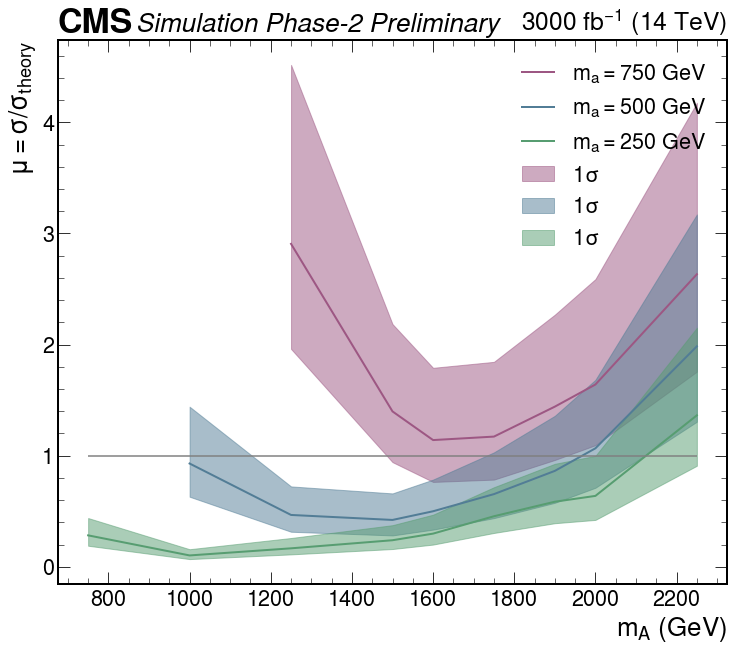

In [34]:
#this plot is for the no stat unc cards
fig, (ax) = plt.subplots(figsize=(12,10))
hep.cms.label(
    'Phase-2 Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

x_750 = np.array([1250, 1500, 1600, 1750, 1900, 2000, 2250])
error_down_750 = np.array([1.9608, 0.9421, 0.7639, 0.7848, 0.9617, 1.0946, 1.7565])
y_750 = np.array([2.9062, 1.3984, 1.1406, 1.1719, 1.4414, 1.6406, 2.6328])
error_up_750 = np.array([4.5165, 2.1844, 1.7908, 1.8445, 2.2688, 2.5889, 4.1755])

x_500 = np.array([1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
error_down_500 = np.array([0.6309, 0.3156, 0.2825, 0.3348, 0.4382, 0.5760, 0.7115, 1.3058])
y_500 = np.array([0.9297, 0.4668, 0.4219, 0.5000, 0.6543, 0.8633, 1.0664, 1.9844])
error_up_500 = np.array([1.4411, 0.7236, 0.6607, 0.7850, 1.0299, 1.3588, 1.6828, 3.1708])

x_250 = np.array([750, 1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
error_down_250 = np.array([0.1897, 0.0696, 0.1119, 0.1602, 0.2001, 0.3048, 0.3924, 0.4222, 0.9095])
y_250 = np.array([0.2832,0.1025, 0.1665, 0.2393, 0.2988, 0.4551, 0.5859, 0.6382, 1.3633])
error_up_250 = np.array([0.4390,0.1585, 0.2594, 0.3747, 0.4692, 0.7163, 0.9269, 0.9986, 2.1512])


plt.plot(x_750, y_750, linewidth = 2, color='#9D5783', label=r'$m_a=750\ GeV$')
plt.plot(x_500, y_500, linewidth = 2, color='#527D96', label=r'$m_a=500\ GeV$')
plt.plot(x_250, y_250, linewidth = 2, color='#579D71', label=r'$m_a=250\ GeV$')

plt.fill_between(x_750, error_down_750, error_up_750, color='#9D5783', alpha=0.5, label=r'$1\sigma$')
plt.fill_between(x_500, error_down_500, error_up_500, color='#527D96', alpha=0.5, label=r'$1\sigma$')
plt.fill_between(x_250, error_down_250, error_up_250, color='#579D71', alpha=0.5, label=r'$1\sigma$')

plt.hlines(1, 750, 2250,linewidths = 1.5,color='gray',zorder=5)
plt.xlabel(r'$m_A\ (GeV)$')
plt.ylabel(r'$\mu=\sigma/\sigma_{theory}$')
plt.legend()
#plt.ylim((0,3))
#plt.yscale('log')
plt.show()
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/limit_scan_5.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/limit_scan_5.pdf')

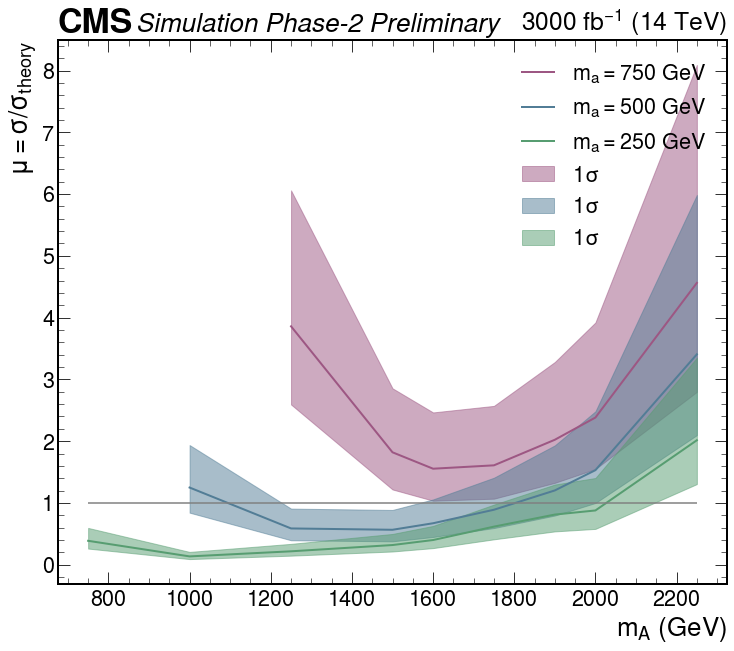

In [38]:
#this plot is for the naive stat unc cards
fig, (ax) = plt.subplots(figsize=(12,10))
hep.cms.label(
    'Phase-2 Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

x_750 = np.array([1250, 1500, 1600, 1750, 1900, 2000, 2250])
error_down_750 = np.array([2.5942, 1.2190, 1.0372, 1.0697, 1.3264, 1.5499, 2.7991])
y_750 = np.array([3.8594, 1.8203, 1.5547, 1.6094, 2.0234, 2.3828, 4.5625])
error_up_750 = np.array([6.0592, 2.8560, 2.4657, 2.5716, 3.2817, 3.9215, 8.0906])

x_500 = np.array([1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
error_down_500 = np.array([0.8434, 0.3966, 0.3793, 0.4499, 0.5942, 0.7967, 0.9999, 2.0986])
y_500 = np.array([1.2500, 0.5879, 0.5664, 0.6719, 0.8906, 1.2031, 1.5312, 3.4062])
error_up_500 = np.array([1.9376, 0.9089, 0.8870, 1.0575, 1.4089, 1.9321, 2.4834, 5.9860])

x_250 = np.array([750, 1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
error_down_250 = np.array([0.2622, 0.0918, 0.1473, 0.2147, 0.2697, 0.4118, 0.5400, 0.5806, 1.3060])
y_250 = np.array([0.3877, 0.1353, 0.2178, 0.3193, 0.4004, 0.6172, 0.8125, 0.8789, 2.0156])
error_up_250 = np.array([0.5963, 0.2080, 0.3384, 0.4988, 0.6286, 0.9739, 1.2983, 1.4044, 3.3493])


plt.plot(x_750, y_750, linewidth = 2, color='#9D5783', label=r'$m_a=750\ GeV$')
plt.plot(x_500, y_500, linewidth = 2, color='#527D96', label=r'$m_a=500\ GeV$')
plt.plot(x_250, y_250, linewidth = 2, color='#579D71', label=r'$m_a=250\ GeV$')

plt.fill_between(x_750, error_down_750, error_up_750, color='#9D5783', alpha=0.5, label=r'$1\sigma$')
plt.fill_between(x_500, error_down_500, error_up_500, color='#527D96', alpha=0.5, label=r'$1\sigma$')
plt.fill_between(x_250, error_down_250, error_up_250, color='#579D71', alpha=0.5, label=r'$1\sigma$')

plt.hlines(1, 750, 2250,linewidths = 1.5,color='gray',zorder=5)
plt.xlabel(r'$m_A\ (GeV)$')
plt.ylabel(r'$\mu=\sigma/\sigma_{theory}$')
plt.legend()
#plt.ylim((0,3))
#plt.yscale('log')
plt.show()
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/limit_scan_5.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/limit_scan_5.pdf')

In [ ]:
#this plot is for the mc stat unc cards
fig, (ax) = plt.subplots(figsize=(10,10))
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )

x_750 = np.array([1250, 1500, 1600, 1750, 1900, 2000, 2250])
error_down_750 = np.array([7.0709, 2.1604, 1.5807, 1.3863, 1.4739, 1.5492, 2.6526])
y_750 = np.array([10.3438, 3.1719, 2.3516, 2.0547, 2.1797, 2.3047, 3.5000])
error_up_750 = np.array([15.8274, 4.8914, 3.7013, 3.2013, 3.4134, 3.6092, 5.4950])

x_500 = np.array([1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
error_down_500 = np.array([3.1098, 0.8305, 0.5449, 0.5956, 0.6694, 0.8087, 0.9794, 1.8151])
y_500 = np.array([4.4844, 1.2148, 0.8047, 0.8828, 0.9922, 1.2031, 1.4570, 2.8125])
error_up_500 = np.array([6.7545, 1.8589, 1.2409, 1.3719, 1.5459, 1.8793, 2.2875, 4.6959])

x_250 = np.array([750, 1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
error_down_250 = np.array([1.0390, 0.2445, 0.2528, 0.2823, 0.3189, 0.4437, 0.5441, 0.5789, 1.2801])
y_250 = np.array([1.4570, 0.3564, 0.3711, 0.4160, 0.4727, 0.6602, 0.8125, 0.8711, 1.9453])
error_up_250 = np.array([2.1365, 0.5426, 0.5708, 0.6465, 0.7345, 1.0312, 1.2789, 1.3850, 3.1550])


plt.plot(x_750, y_750, linewidth = 1.75, color='#9D5783', label=r'$m_a=750\ GeV$')
plt.plot(x_500, y_500, linewidth = 1.75, color='#527D96', label=r'$m_a=500\ GeV$')
plt.plot(x_250, y_250, linewidth = 1.75, color='#579D71', label=r'$m_a=250\ GeV$')

plt.fill_between(x_750, error_down_750, error_up_750, color='#9D5783', alpha=0.5)
plt.fill_between(x_500, error_down_500, error_up_500, color='#527D96', alpha=0.5)
plt.fill_between(x_250, error_down_250, error_up_250, color='#579D71', alpha=0.5)

plt.hlines(1, 750, 2250,linewidths = 1.0,color='gray',zorder=5)
plt.xlabel(r'$m_A\ (GeV)$')
plt.ylabel(r'$\mu=\sigma/\sigma_{theory}$')
plt.legend()
#plt.ylim((0,3))
#plt.yscale('log')
plt.show()
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/limit_scan_5.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/limit_scan_5.pdf')

In [ ]:
#flat theory uncs with no stat uncs
fig, (ax) = plt.subplots(figsize=(10,10))
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )
x_750 = np.array([1250, 1500, 1600, 1750, 1900, 2000, 2250])
y_750 = np.array([0.618005, 1.65388, 1.90244, 1.82325, 1.51992, 1.35061, 0.838049])
#error_up_750 = np.array([3.6189, 0.9219, 0.6194, 0.5942, 0.7469, 0.8486, 1.3864])
#error_down_750 = np.array([2.4117, 0.5971, 0.3938, 0.3860, 0.4810, 0.5306, 0.8774])

x_500 = np.array([1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
y_500 = np.array([1.51529, 4.37254, 4.76014, 4.08235, 3.23067, 2.51572, 2.07509, 1.16525])
#error_up_750 = np.array([3.6189, 0.9219, 0.6194, 0.5942, 0.7469, 0.8486, 1.3864])
#error_down_750 = np.array([2.4117, 0.5971, 0.3938, 0.3860, 0.4810, 0.5306, 0.8774])

x_250 = np.array([750, 1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
y_250 = np.array([5.46603, 17.0691, 11.3753, 7.88023, 6.58418, 4.47284, 3.54457, 3.29906, 1.68047])
#error_up_250 = np.array([0.5288, 0.1251, 0.1048, 0.1215, 0.1549, 0.2377, 0.3109, 0.3541, 0.8388])
#error_down_250 = np.array([0.3604, 0.0843, 0.0680, 0.0789, 0.0989, 0.1544, 0.1951, 0.2169, 0.5046])

plt.plot(x_750, y_750, linewidth = 1.75, color='#9D5783', label=r'$m_a=750\ GeV$')
plt.plot(x_500, y_500, linewidth = 1.75, color='#527D96', label=r'$m_a=500\ GeV$')
plt.plot(x_250, y_250, linewidth = 1.75, color='#579D71', label=r'$m_a=250\ GeV$')
#plt.fill_between(x_750, y_750-error_down_750, y_750+error_up_750, color='#9D5783', alpha=0.5)
#plt.fill_between(x_250, y_250-error_down_250, y_250+error_up_250, color='#D4969A', alpha=0.5)
plt.hlines(3, 750, 2250,linewidths = 1.0,color='gray',zorder=5)
plt.hlines(5, 750, 2250,linewidths = 1.0,color='gray',zorder=5)
plt.xlabel(r'$m_A\ (GeV)$')
plt.ylabel(r'$Significance$')
plt.legend()
#plt.ylim((0,3))
#plt.yscale('log')
plt.show()
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/significance_scan_4.png')
fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/significance_scan_4.pdf')

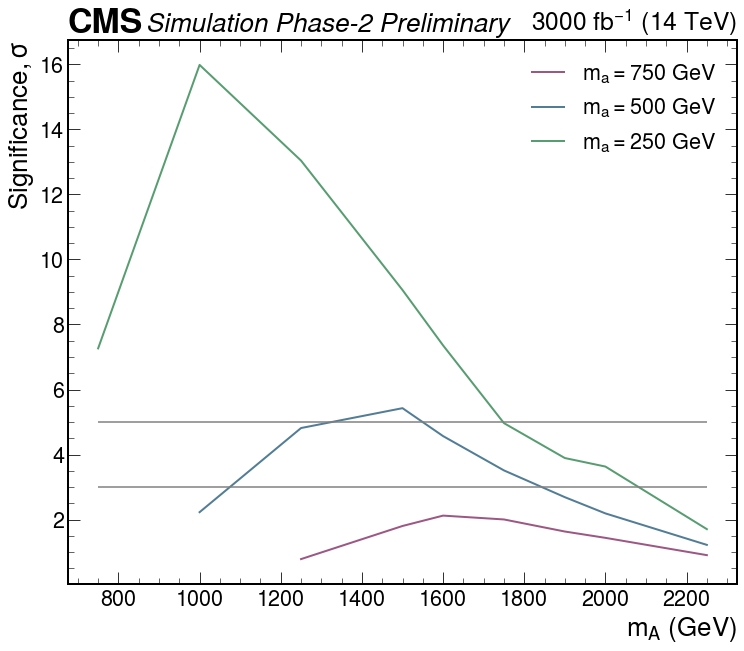

In [32]:
#theory uncs with no stat uncs
fig, (ax) = plt.subplots(figsize=(12,10))
hep.cms.label(
    'Phase-2 Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )
x_750 = np.array([1250, 1500, 1600, 1750, 1900, 2000, 2250])
y_750 = np.array([0.785411, 1.80345, 2.12254, 2.00442, 1.63336, 1.43864, 0.906584])
#error_up_750 = np.array([3.6189, 0.9219, 0.6194, 0.5942, 0.7469, 0.8486, 1.3864])
#error_down_750 = np.array([2.4117, 0.5971, 0.3938, 0.3860, 0.4810, 0.5306, 0.8774])

x_500 = np.array([1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
y_500 = np.array([2.22852, 4.81585, 5.42687, 4.5678, 3.5127, 2.68966, 2.1904, 1.22233])
#error_up_750 = np.array([3.6189, 0.9219, 0.6194, 0.5942, 0.7469, 0.8486, 1.3864])
#error_down_750 = np.array([2.4117, 0.5971, 0.3938, 0.3860, 0.4810, 0.5306, 0.8774])

x_250 = np.array([750, 1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
y_250 = np.array([7.26577, 15.9833, 13.0402, 9.06115, 7.35736, 4.96683, 3.89327, 3.63111, 1.70608])
#error_up_250 = np.array([0.5288, 0.1251, 0.1048, 0.1215, 0.1549, 0.2377, 0.3109, 0.3541, 0.8388])
#error_down_250 = np.array([0.3604, 0.0843, 0.0680, 0.0789, 0.0989, 0.1544, 0.1951, 0.2169, 0.5046])

plt.plot(x_750, y_750, linewidth = 2, color='#9D5783', label=r'$m_a=750\ GeV$')
plt.plot(x_500, y_500, linewidth = 2, color='#527D96', label=r'$m_a=500\ GeV$')
plt.plot(x_250, y_250, linewidth = 2, color='#579D71', label=r'$m_a=250\ GeV$')
#plt.fill_between(x_750, y_750-error_down_750, y_750+error_up_750, color='#9D5783', alpha=0.5)
#plt.fill_between(x_250, y_250-error_down_250, y_250+error_up_250, color='#D4969A', alpha=0.5)
plt.hlines(3, 750, 2250,linewidths = 1.5,color='gray',zorder=5)
plt.hlines(5, 750, 2250,linewidths = 1.5,color='gray',zorder=5)
plt.xlabel(r'$m_A\ (GeV)$')
plt.ylabel(r'$Significance, \sigma$')
plt.legend()
#plt.ylim((0,3))
#plt.yscale('log')
plt.show()
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/significance_scan_4.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/significance_scan_4.pdf')

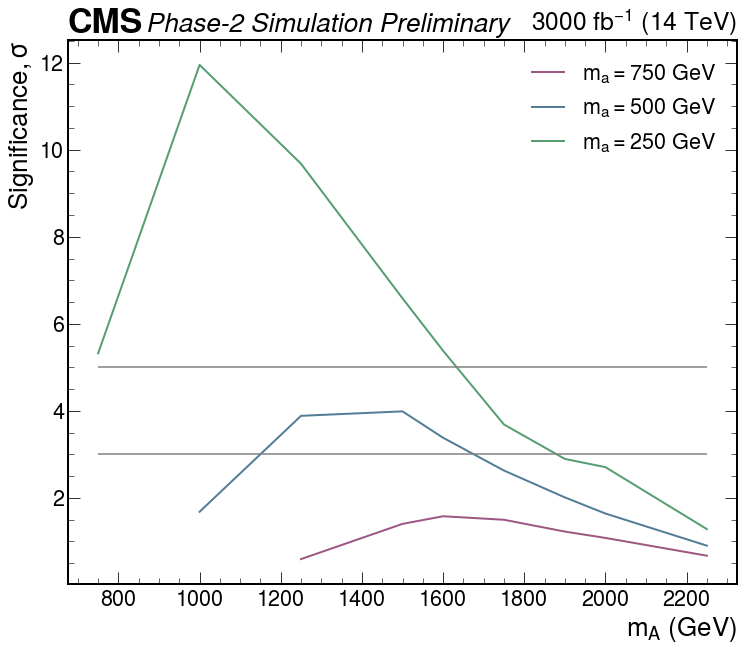

In [37]:
#theory unc with sqrt stat unc
fig, (ax) = plt.subplots(figsize=(12,10))
hep.cms.label(
    'Phase-2 Simulation Preliminary',
    data = True,
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )
x_750 = np.array([1250, 1500, 1600, 1750, 1900, 2000, 2250])
y_750 = np.array([0.595012, 1.40369, 1.57912, 1.49851, 1.22724, 1.08119, 0.67304])


x_500 = np.array([1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
y_500 = np.array([1.68236, 3.88629, 3.98868, 3.38272, 2.62916, 2.01244, 1.64176, 0.903549])


x_250 = np.array([750, 1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
y_250 = np.array([5.32253, 11.9477, 9.67666, 6.58491, 5.3813, 3.68729, 2.89645, 2.70754, 1.28337])


plt.plot(x_750, y_750, linewidth = 2, color='#9D5783', label=r'$m_a=750\ GeV$')
plt.plot(x_500, y_500, linewidth = 2, color='#527D96', label=r'$m_a=500\ GeV$')
plt.plot(x_250, y_250, linewidth = 2, color='#579D71', label=r'$m_a=250\ GeV$')
#plt.fill_between(x_750, y_750-error_down_750, y_750+error_up_750, color='#9D5783', alpha=0.5)
#plt.fill_between(x_250, y_250-error_down_250, y_250+error_up_250, color='#D4969A', alpha=0.5)
plt.hlines(3, 750, 2250,linewidths = 1.5,color='gray',zorder=5)
plt.hlines(5, 750, 2250,linewidths = 1.5,color='gray',zorder=5)
plt.xlabel(r'$m_A\ (GeV)$')
plt.ylabel(r'$Significance, \sigma$')
plt.legend()
#plt.ylim((0,3))
#plt.yscale('log')
plt.show()
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/significance_scan_4.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/significance_scan_4.pdf')

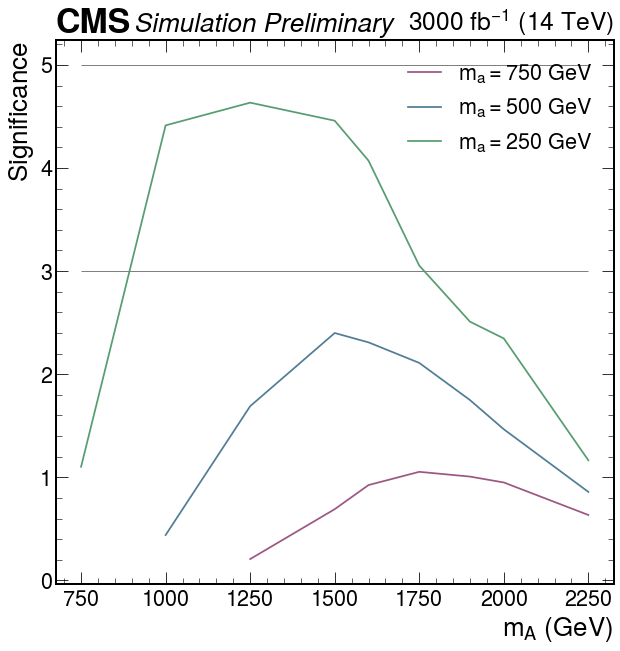

In [35]:
#theory uncs with mc uncs
fig, (ax) = plt.subplots(figsize=(10,10))
hep.cms.label(
    'Preliminary',
    loc=0,
    ax=ax,
    lumi = 3000,
    rlabel = r'$3000\ fb^{-1}\ (14\ TeV)$',
    )
x_750 = np.array([1250, 1500, 1600, 1750, 1900, 2000, 2250])
y_750 = np.array([0.206734, 0.690881, 0.92483, 1.05315, 1.00697, 0.949916, 0.634693])
#error_up_750 = np.array([3.6189, 0.9219, 0.6194, 0.5942, 0.7469, 0.8486, 1.3864])
#error_down_750 = np.array([2.4117, 0.5971, 0.3938, 0.3860, 0.4810, 0.5306, 0.8774])

x_500 = np.array([1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
y_500 = np.array([0.439893, 1.68968, 2.39959, 2.30884, 2.10976, 1.74926, 1.46596, 0.85852])
#error_up_750 = np.array([3.6189, 0.9219, 0.6194, 0.5942, 0.7469, 0.8486, 1.3864])
#error_down_750 = np.array([2.4117, 0.5971, 0.3938, 0.3860, 0.4810, 0.5306, 0.8774])

x_250 = np.array([750, 1000, 1250, 1500, 1600, 1750, 1900, 2000, 2250])
y_250 = np.array([1.10189, 4.41348, 4.63391, 4.45894, 4.0714, 3.05356, 2.50963, 2.34686, 1.16499])
#error_up_250 = np.array([0.5288, 0.1251, 0.1048, 0.1215, 0.1549, 0.2377, 0.3109, 0.3541, 0.8388])
#error_down_250 = np.array([0.3604, 0.0843, 0.0680, 0.0789, 0.0989, 0.1544, 0.1951, 0.2169, 0.5046])

plt.plot(x_750, y_750, linewidth = 1.75, color='#9D5783', label=r'$m_a=750\ GeV$')
plt.plot(x_500, y_500, linewidth = 1.75, color='#527D96', label=r'$m_a=500\ GeV$')
plt.plot(x_250, y_250, linewidth = 1.75, color='#579D71', label=r'$m_a=250\ GeV$')
#plt.fill_between(x_750, y_750-error_down_750, y_750+error_up_750, color='#9D5783', alpha=0.5)
#plt.fill_between(x_250, y_250-error_down_250, y_250+error_up_250, color='#D4969A', alpha=0.5)
plt.hlines(3, 750, 2250,linewidths = 1.0,color='gray',zorder=5)
plt.hlines(5, 750, 2250,linewidths = 1.0,color='gray',zorder=5)
plt.xlabel(r'$m_A\ (GeV)$')
plt.ylabel(r'$Significance$')
plt.legend()
#plt.ylim((0,3))
#plt.yscale('log')
plt.show()
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/significance_scan_4.png')
#fig.savefig('/home/users/ewallace/public_html/HbbMET/plots/significance_scan_4.pdf')